In [1]:
#Importing require packeges
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#importing NLP packeges 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import re
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
%matplotlib inline
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
pd.options.mode.chained_assignment = None

In [7]:
#reading the file
df1 = pd.read_csv("train/train.csv")
df2 = pd.read_csv("test/test.csv")

In [8]:
#Looking at train data
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
#Looking for a test data
df2.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


- Let's start with dividing our datsete into two part, First one contain postitive tweets and second one contain negative tweet 

In [11]:

train_postweets = df1[df1['label']==0]
train_negtweets= df1[df1['label']==1]

- Using Word Clouds to see the higher fequency words 

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

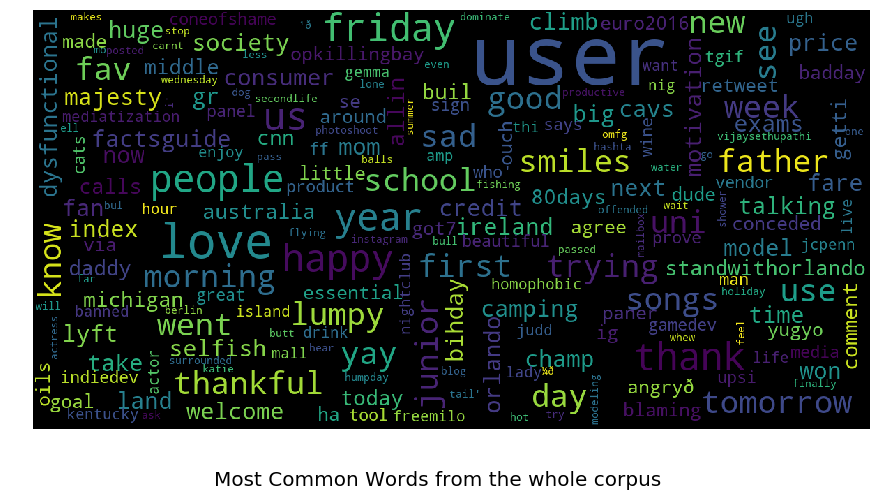

In [22]:

show_wordcloud(df1['tweet'],'Most Common Words from the whole corpus')

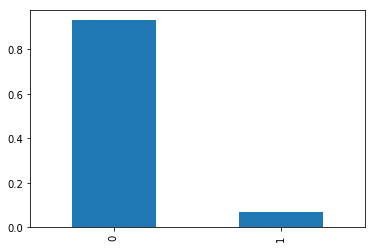

In [32]:
#Bar plot for positive and negative tweets 
df1['label'].value_counts(normalize = True).plot.bar()

# Data Cleaning 

In [39]:
#let's clean the tweets from hashtags, mentions and links 
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) 
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [42]:
#let's look the cleaned data
df1['clean_tweet']  = df1['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df1.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think school exams...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome gr


In [45]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df1,test_size = 0.2,random_state=0)

In [46]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

- Let's convert the all text in the document (CountVectorizer)
- Also TfidfVectorizer

In [47]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc', LinearSVC(random_state=0,max_iter=5000))])
nb_pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb', MultinomialNB())])

In [48]:
svc_pipe.fit(train_clean_tweet,train['label'])
nb_pipe.fit(train_clean_tweet,train['label'])

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [49]:
pred_svc = svc_pipe.predict(test_clean_tweet)
pred_nb = nb_pipe.predict(test_clean_tweet)

In [52]:
# let's Print the Accuracy score and confustion matrix
print('SVC')
print(accuracy_score(test['label'],pred_svc))
print('\n')
print(confusion_matrix(test['label'],pred_svc))
print('\n')

SVC
0.9665258876896605


[[5946   39]
 [ 175  233]]




In [53]:
print('Naive Bayes Classifier')
print(accuracy_score(test['label'],pred_nb))
print('\n')
print(confusion_matrix(test['label'],pred_nb))
print('\n')

Naive Bayes Classifier
0.9440012513686845


[[5985    0]
 [ 358   50]]


